## Importing the necessary libraries

In [27]:
import pandas as pd
import json
from google.cloud import storage
from pyspark.sql import SparkSession
import re
import ast
from google.cloud import bigquery
import numpy as np
import seaborn as sns

In [32]:
def ingest_internet_data(INPUT_PATH, OUTPUT_PATH):
    '''
    Function to import Internet data from Google Cloud Storage
    '''
    data = pd.read_json(INPUT_PATH, lines=True)
    phone_no = []
    source_IP = []
    dest_IP = []
    start_time = []
    source_port = []
    dest_port = []
    ASN = []
    no_of_packets = []
    no_of_bytes = []
    for lab, row in data.iterrows():
        phone_no.append(row['root']['phone_number'])
        source_IP.append(row['source']['ip'])
        dest_IP.append(row['destination']['ip'])
        start_time.append(row['root']['time'])
        source_port.append(row['source']['port'])
        dest_port.append(row['destination']['port'])
        ASN.append(row['root']['asn'])
        no_of_packets.append(float(row['root']['num_packets']))
        no_of_bytes.append(float(row['root']['num_bytes']))
        df = pd.DataFrame()
    df['phone_no'] = phone_no
    df['source_IP'] = source_IP
    df['dest_IP'] = dest_IP
    df['start_time1'] = start_time
    df['start_time'] = pd.to_datetime(df['start_time1'])
    df.drop('start_time1', axis = 1, inplace = True)
    df['source_port'] = source_port
    df['dest_port'] = dest_port
    df['ASN'] = ASN
    df['no_of_packets'] = no_of_packets
    df['no_of_bytes'] = no_of_bytes
    df.replace('nan', np.nan, inplace=True)
    df.to_gbq(OUTPUT_PATH,  project_id='acn-in-cf-data-ggl-aca-c01-t04', if_exists='replace')

In [33]:
ingest_internet_data("gs://in-telecom-t4/Test/internet_data_json_2021-04-01_00:00:00.json", 'test1.internet_test2')

1it [00:05,  5.08s/it]


<strong>*********************************************************************************************************************************************</strong>

## EDA of a sample of the Internet Data

In [3]:
data = pd.read_json("gs://in-telecom-t4/Test/internet_data_json_2021-04-01_00:00:00.json", lines=True)
data.head()

,root,source,destination,roaming
0,"{'phone_number': '1209371123921', 'time': '202...","{'ip': '135.0777d.04511.232', 'port': '36619.0'}","{'ip': '135.b1d10.d1c38.150', 'port': '22.0'}","{'Bool': '0.0', 'partner': 'nan'}"
1,"{'phone_number': '1148414940387', 'time': '202...","{'ip': '135.0777d.04511.237', 'port': '60422.0'}","{'ip': '135.b1d10.d1c38.118', 'port': '22.0'}","{'Bool': '1.0', 'partner': 'Cole-Moreno'}"
2,"{'phone_number': '5312921847983', 'time': '202...","{'ip': '135.b1d10.6f3ef.110', 'port': 'nan'}","{'ip': '135.0777d.04511.237', 'port': '37862.0'}","{'Bool': '1.0', 'partner': 'Bird PLC'}"
3,"{'phone_number': '5009422257441', 'time': '202...","{'ip': '135.fa7cd.19ca1.167', 'port': '65357.0'}","{'ip': '135.b1d10.091d5.211', 'port': '22.0'}","{'Bool': '1.0', 'partner': 'Cole-Moreno'}"
4,"{'phone_number': '8479748385471', 'time': '202...","{'ip': '135.0777d.04511.237', 'port': '59679.0'}","{'ip': '135.b1d10.b1d10.27', 'port': '22.0'}","{'Bool': '1.0', 'partner': 'Cole-Moreno'}"


In [4]:
for cols in data.columns:
    print(data[cols][0])

{'phone_number': '1209371123921', 'time': '2021-04-01 01:04:49', 'flags': '----S-,---R--,-A----,-A---F,-AP---', 'site': '45c48', 'asn': 'c4ca4', 'num_packets': '7.0', 'num_bytes': '385.0', 'usn': '80595433217787509749'}
{'ip': '135.0777d.04511.232', 'port': '36619.0'}
{'ip': '135.b1d10.d1c38.150', 'port': '22.0'}
{'Bool': '0.0', 'partner': 'nan'}


In [20]:
phone_no = []
source_IP = []
dest_IP = []
start_time = []
source_port = []
dest_port = []
ASN = []
no_of_packets = []
no_of_bytes = []

In [21]:
for lab, row in data.iterrows():
    phone_no.append(row['root']['phone_number'])
    source_IP.append(row['source']['ip'])
    dest_IP.append(row['destination']['ip'])
    start_time.append(row['root']['time'])
    source_port.append(row['source']['port'])
    dest_port.append(row['destination']['port'])
    ASN.append(row['root']['asn'])
    no_of_packets.append(float(row['root']['num_packets']))
    no_of_bytes.append(float(row['root']['num_bytes']))

In [24]:
df = pd.DataFrame()
df['phone_no'] = phone_no
df['source_IP'] = source_IP
df['dest_IP'] = dest_IP
df['start_time1'] = start_time
df['start_time'] = pd.to_datetime(df['start_time1'])
df.drop('start_time1', axis = 1, inplace = True)
df['source_port'] = source_port
df['dest_port'] = dest_port
df['ASN'] = ASN
df['no_of_packets'] = no_of_packets
df['no_of_bytes'] = no_of_bytes
df.replace('nan', np.nan, inplace=True)

In [25]:
df.head()

,phone_no,source_IP,dest_IP,start_time,source_port,dest_port,ASN,no_of_packets,no_of_bytes
0,1209371123921,135.0777d.04511.232,135.b1d10.d1c38.150,2021-04-01 01:04:49,36619.0,22.0,c4ca4,7.0,385.0
1,1148414940387,135.0777d.04511.237,135.b1d10.d1c38.118,2021-04-01 01:04:54,60422.0,22.0,c4ca4,12.0,1008.0
2,5312921847983,135.b1d10.6f3ef.110,135.0777d.04511.237,2021-04-01 01:04:46,NaN,37862.0,c4ca4,5.0,420.0
3,5009422257441,135.fa7cd.19ca1.167,135.b1d10.091d5.211,2021-04-01 00:04:27,65357.0,22.0,c4ca4,21.0,2868.0
4,8479748385471,135.0777d.04511.237,135.b1d10.b1d10.27,2021-04-01 01:04:55,59679.0,22.0,c4ca4,11.0,956.0


## Loading the ingested Internet data to BigQuery

In [30]:
df.to_gbq('test1.internet_test1',  project_id='acn-in-cf-data-ggl-aca-c01-t04', if_exists='replace')

1it [00:04,  4.94s/it]


In [35]:
df['source_IP'].isnull().value_counts()

False    9779
True      488
Name: source_IP, dtype: int64

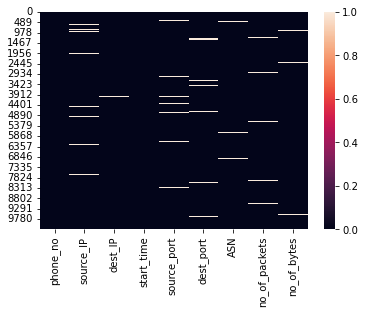

In [36]:
sns.heatmap(df.isnull());